<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/version2/feature_engineering/CA_PCA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal**

Dimensionality Reduction using PCA on CA timeseries data


## Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [5]:
!ls '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021'

 CA_alldatasets_Jan13.csv
 CA_CombinedData_Labeled_CDCGuideline_Jan15.csv
 CA_CovidDataJan10.csv
 CA_GoogleMobilityDataJan10.csv
 CA_MarylandData_Labeled_CDCGuideline_Jan15.csv
 CA_processedMarylandData_Jan11.csv
 CA_SocialDistancingDataJan10.csv
 computed_CA_mobility_data.csv
 data-mask_for_all.csv
 election_results_2021.csv
 maryland_inertia_data_allstates_Jan11.csv
 maryland_inertia_raw_dec28_2020.csv
 Mask_Rule_Jan10.csv
 NY_alldatasets_Jan13.csv
 NY_CombinedData_Labeled_CDCGuideline_Jan15.csv
 NY_CovidDataJan10.csv
 NY_GoogleMobilityDataJan10.csv
 NY_MarylandData_Labeled_CDCGuideline_Jan15.csv
 NY_processedMarylandData_Jan11.csv
 NY_SocialDistancingDataJan10.csv
'Policy_Map_(Sized)_Full_Data_data.csv'
 TX_alldatasets_Jan11.csv
 TX_CombinedData_Labeled_CDCGuideline_Jan15.csv
 TX_CovidDataJan10.csv
 TX_GoogleMobilityDataJan10.csv
 TX_MarylandData_Labeled_CDCGuideline_Jan15.csv
 TX_processedMarylandData_Jan11.csv
 TX_processedMarylandData_Jan11.gsheet
 TX_SocialDistancingDataJan10.cs

# Import library

In [26]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting

import seaborn as sns


# Load data

In [6]:
CA_combined_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/CA_alldatasets_Jan13.csv',low_memory=False)
CA_combined_data.head()

,Date,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-03-01,California,6001,0,Alameda County,1671329,0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0
1,2020-03-02,California,6001,0,Alameda County,1671329,0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0
2,2020-03-03,California,6001,1,Alameda County,1671329,0,6.271,100,5.0,12.0,41.0,0.0,1.0,-1.0
3,2020-03-04,California,6001,0,Alameda County,1671329,0,6.209,99,1.0,6.0,23.0,-3.0,1.0,0.0
4,2020-03-05,California,6001,0,Alameda County,1671329,0,6.654,106,1.0,6.0,12.0,-5.0,-1.0,1.0


## Preprocessing: Convert 'date' as index column before applying PCA

In [8]:
CA_combined_data['Date'] = pd.to_datetime(CA_combined_data['Date'], format='%Y-%m-%d') 


,Date,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-03-01,California,6001,0,Alameda County,1671329,0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0
1,2020-03-02,California,6001,0,Alameda County,1671329,0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0
2,2020-03-03,California,6001,1,Alameda County,1671329,0,6.271,100,5.0,12.0,41.0,0.0,1.0,-1.0
3,2020-03-04,California,6001,0,Alameda County,1671329,0,6.209,99,1.0,6.0,23.0,-3.0,1.0,0.0
4,2020-03-05,California,6001,0,Alameda County,1671329,0,6.654,106,1.0,6.0,12.0,-5.0,-1.0,1.0


In [9]:
CA_combined_data = CA_combined_data.set_index('Date')
CA_combined_data.head()

,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Date,,,,,,,,,,,,,,
2020-03-01,California,6001,0,Alameda County,1671329,0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0
2020-03-02,California,6001,0,Alameda County,1671329,0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0
2020-03-03,California,6001,1,Alameda County,1671329,0,6.271,100,5.0,12.0,41.0,0.0,1.0,-1.0
2020-03-04,California,6001,0,Alameda County,1671329,0,6.209,99,1.0,6.0,23.0,-3.0,1.0,0.0
2020-03-05,California,6001,0,Alameda County,1671329,0,6.654,106,1.0,6.0,12.0,-5.0,-1.0,1.0


In [11]:
CA_combined_data_filtered = CA_combined_data[['FIPS','population','mask_rule_active','m50','m50_index',
                                              'retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline',
                                              'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
                                              'residential_percent_change_from_baseline','New cases']]
CA_combined_data_filtered.head()

,FIPS,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,New cases
Date,,,,,,,,,,,,
2020-03-01,6001,1671329,0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0,0
2020-03-02,6001,1671329,0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0,0
2020-03-03,6001,1671329,0,6.271,100,5.0,12.0,41.0,0.0,1.0,-1.0,1
2020-03-04,6001,1671329,0,6.209,99,1.0,6.0,23.0,-3.0,1.0,0.0,0
2020-03-05,6001,1671329,0,6.654,106,1.0,6.0,12.0,-5.0,-1.0,1.0,0


In [15]:
print(CA_combined_data_filtered.shape)
CA_combined_data_filtered = CA_combined_data_filtered.dropna()
print(CA_combined_data_filtered.shape)


(15821, 12)
(10478, 12)


## Standardizing the data

In [16]:
X = CA_combined_data_filtered.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Apply PCA

In [17]:
pca = PCA()
X_pca = pca.fit(X_std)

## Determine the number of components

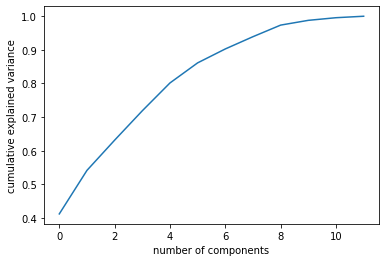

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Dimensionality Reduction

In [19]:
num_components = 8
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Important feature set

In [20]:
pd.DataFrame(pca.components_, columns = CA_combined_data_filtered.columns)


,FIPS,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,New cases
0,-0.013642,0.109006,-0.068231,-0.348062,-0.368038,-0.396530,-0.353856,-0.249288,-0.338678,-0.338533,0.385104,0.066860
1,-0.204931,0.622797,0.287373,0.033742,-0.002149,0.130840,-0.009798,-0.109292,-0.011384,0.085472,-0.099252,0.663291
2,-0.201645,0.289305,-0.829698,0.206152,0.181593,-0.111757,0.218457,-0.158714,0.063567,-0.014047,0.143514,0.039123
3,0.267579,0.092018,0.167675,0.438608,0.346165,-0.005182,0.056743,0.347709,-0.175803,-0.514759,0.390678,0.083363
4,0.879766,0.097874,-0.113626,0.053121,0.020278,-0.013298,-0.061194,-0.366975,0.038378,0.191791,-0.077345,0.132130
5,0.236829,0.003898,-0.209084,-0.344064,-0.378263,-0.075645,0.335601,0.612729,0.214393,-0.054026,0.012179,0.309678
6,-0.095217,-0.529414,0.014408,-0.019580,0.072677,0.090440,0.052777,-0.366977,0.474111,-0.307298,0.172052,0.458617
7,-0.020664,-0.375142,-0.100763,-0.045424,0.043175,0.177287,0.349602,-0.073514,-0.753807,0.130363,-0.058421,0.311563


In [21]:

n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = CA_combined_data_filtered.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [24]:
print(" initial_feature_names : ",initial_feature_names)

print("most_important_names: ", most_important_names)

print(len(initial_feature_names) - len(most_important_names))

 initial_feature_names :  Index(['FIPS', 'population', 'mask_rule_active', 'm50', 'm50_index',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'New cases'],
      dtype='object')
most_important_names:  ['retail_and_recreation_percent_change_from_baseline', 'New cases', 'mask_rule_active', 'workplaces_percent_change_from_baseline', 'FIPS', 'parks_percent_change_from_baseline', 'population', 'transit_stations_percent_change_from_baseline']
4


# Conclusion for aggregated dataset analysis:

From the above PCA analysis, we can drop the following columns from Time-series forecasting

* m50
* m50-index
* grocery_and_pharmacy_percent_change_from_baseline
* residential_percent_change_from_baseline

## Side-track: [ plotting correlation ]

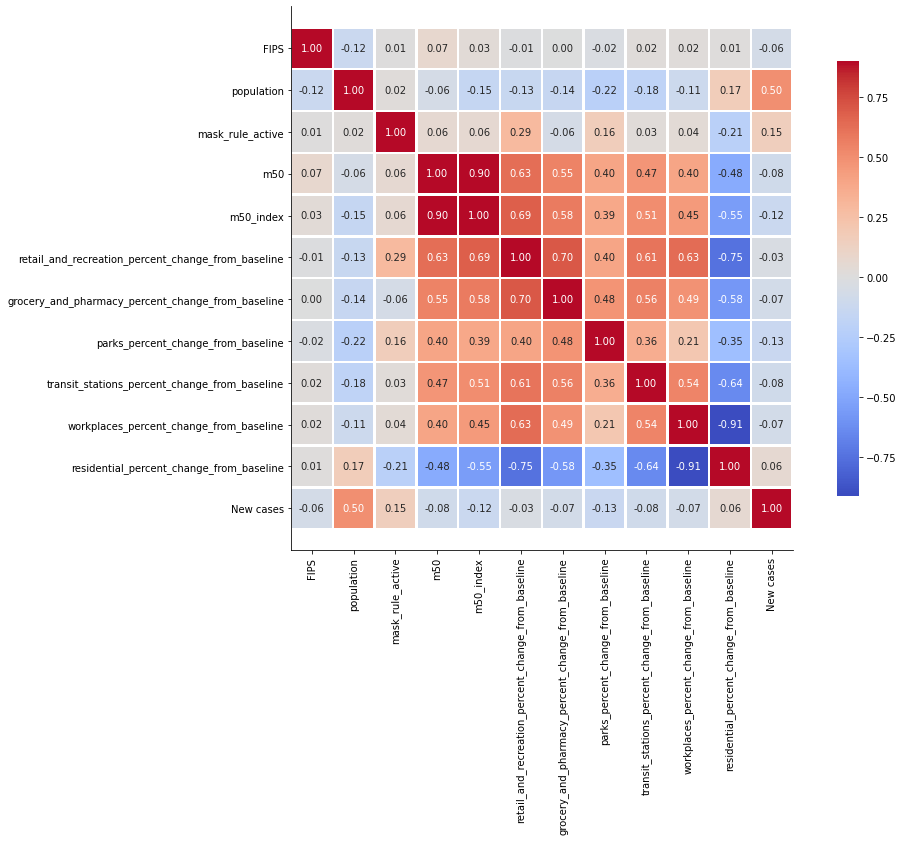

In [27]:

corr = CA_combined_data_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

# Plotting each feature as per time-series for CA

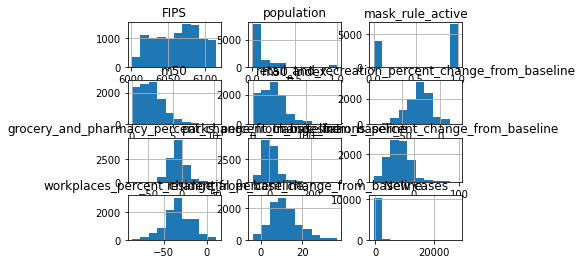

In [29]:
CA_combined_data_filtered.hist()
plt.show()

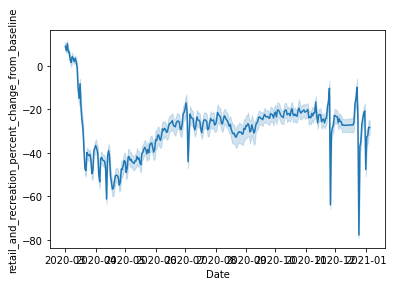

In [37]:
sns.lineplot(x="Date", y="retail_and_recreation_percent_change_from_baseline", data=CA_combined_data_filtered)

In [ ]:
fig = go.Figure([{
    'x': df.index,
    'y': df[col],
    'name': col
}  for col in df.columns])

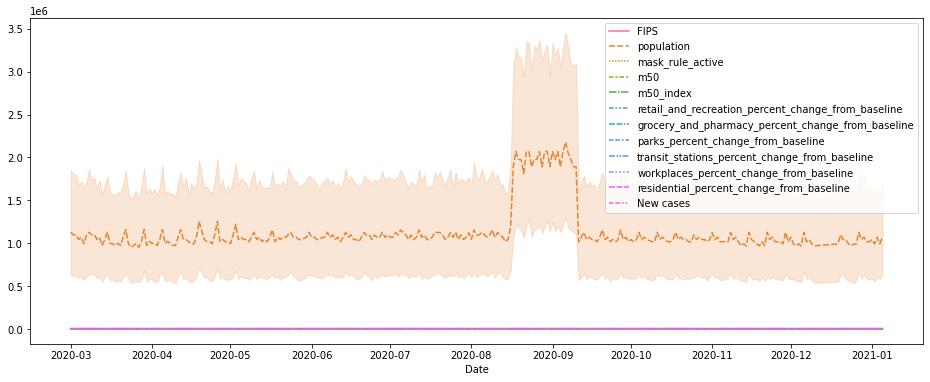

In [39]:
plt.figure(figsize=(16, 6))
sns.lineplot(data = CA_combined_data_filtered)


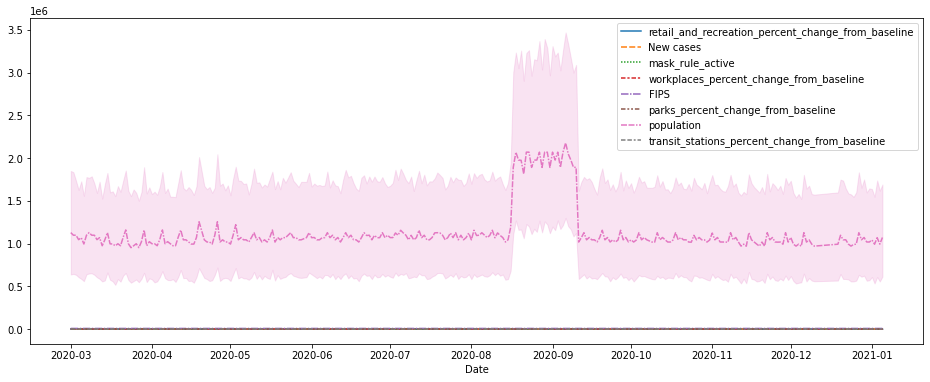

In [40]:
plt.figure(figsize=(16, 6))
sns.lineplot(data = CA_combined_data_filtered[most_important_names])


# PCA Analyis on Maryland inertia dataset

## Load data

In [42]:
!ls '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/'

 CA_alldatasets_Jan13.csv
 CA_CombinedData_Labeled_CDCGuideline_Jan15.csv
 CA_CovidDataJan10.csv
 CA_GoogleMobilityDataJan10.csv
 CA_MarylandData_Labeled_CDCGuideline_Jan15.csv
 CA_processedMarylandData_Jan11.csv
 CA_SocialDistancingDataJan10.csv
 computed_CA_mobility_data.csv
 data-mask_for_all.csv
 election_results_2021.csv
 maryland_inertia_data_allstates_Jan11.csv
 maryland_inertia_raw_dec28_2020.csv
 Mask_Rule_Jan10.csv
 NY_alldatasets_Jan13.csv
 NY_CombinedData_Labeled_CDCGuideline_Jan15.csv
 NY_CovidDataJan10.csv
 NY_GoogleMobilityDataJan10.csv
 NY_MarylandData_Labeled_CDCGuideline_Jan15.csv
 NY_processedMarylandData_Jan11.csv
 NY_SocialDistancingDataJan10.csv
'Policy_Map_(Sized)_Full_Data_data.csv'
 TX_alldatasets_Jan11.csv
 TX_CombinedData_Labeled_CDCGuideline_Jan15.csv
 TX_CovidDataJan10.csv
 TX_GoogleMobilityDataJan10.csv
 TX_MarylandData_Labeled_CDCGuideline_Jan15.csv
 TX_processedMarylandData_Jan11.csv
 TX_processedMarylandData_Jan11.gsheet
 TX_SocialDistancingDataJan10.cs

In [43]:
CA_inertia_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/CA_processedMarylandData_Jan11.csv',low_memory=False)
CA_inertia_data.head()

,countyFIPS,County Name,State,population,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,date,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Population.density,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate
0,6001,Alameda County,CA,1671329,6001,Alameda County,6,50,32,2.41,26.1,0.4,38.0,0.20,2.21,0,1666753,-21.7,2020-01-01,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
1,6001,Alameda County,CA,1671329,6001,Alameda County,6,24,22,3.17,27.9,0.4,38.5,0.50,2.66,0,1666753,-5.8,2020-01-02,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
2,6001,Alameda County,CA,1671329,6001,Alameda County,6,21,21,3.28,27.2,0.4,41.0,0.51,2.78,0,1666753,-1.5,2020-01-03,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
3,6001,Alameda County,CA,1671329,6001,Alameda County,6,34,25,3.03,25.8,0.3,41.1,0.26,2.76,0,1666753,-2.2,2020-01-04,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
4,6001,Alameda County,CA,1671329,6001,Alameda County,6,44,29,2.72,24.5,0.4,35.8,0.24,2.48,0,1666753,-12.1,2020-01-05,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,1.3,3.9,5.7,0.3,0.0


In [44]:
CA_inertia_data.columns

Index(['countyFIPS', 'County Name', 'State', 'population', 'CTFIPS', 'CTNAME',
       'STFIPS', 'Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption', 'date', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.people',
       'X.days..decreasi

In [47]:
CA_inertia_data_filtered = CA_inertia_data[['countyFIPS','population','Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption', 'date', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
        'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.people',
       'X.days..decreasing.ILI.cases', 'Unemployment.claims.1000.people',
       'Unemployment.rate', 'X..working.from.home',
       'Cumulative.inflation.rate', 'COVID.death.rate']]

CA_inertia_data_filtered.head()

,countyFIPS,population,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,date,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Population.density,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate
0,6001,1671329,50,32,2.41,26.1,0.4,38.0,0.20,2.21,0,1666753,-21.7,2020-01-01,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
1,6001,1671329,24,22,3.17,27.9,0.4,38.5,0.50,2.66,0,1666753,-5.8,2020-01-02,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
2,6001,1671329,21,21,3.28,27.2,0.4,41.0,0.51,2.78,0,1666753,-1.5,2020-01-03,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
3,6001,1671329,34,25,3.03,25.8,0.3,41.1,0.26,2.76,0,1666753,-2.2,2020-01-04,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
4,6001,1671329,44,29,2.72,24.5,0.4,35.8,0.24,2.48,0,1666753,-12.1,2020-01-05,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,1.3,3.9,5.7,0.3,0.0


## Preprocessing

In [48]:
print(CA_inertia_data_filtered.shape)
CA_inertia_data_filtered.dropna().shape

(21054, 41)


(21054, 41)

In [51]:
CA_inertia_data_filtered['date'] = pd.to_datetime(CA_inertia_data_filtered['date'], format='%Y-%m-%d') 

CA_inertia_data_filtered = CA_inertia_data_filtered.set_index('date')
CA_inertia_data_filtered.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,countyFIPS,population,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Population.density,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,6001,1671329,50,32,2.41,26.1,0.4,38.0,0.20,2.21,0,1666753,-21.7,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
2020-01-02,6001,1671329,24,22,3.17,27.9,0.4,38.5,0.50,2.66,0,1666753,-5.8,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
2020-01-03,6001,1671329,21,21,3.28,27.2,0.4,41.0,0.51,2.78,0,1666753,-1.5,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
2020-01-04,6001,1671329,34,25,3.03,25.8,0.3,41.1,0.26,2.76,0,1666753,-2.2,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
2020-01-05,6001,1671329,44,29,2.72,24.5,0.4,35.8,0.24,2.48,0,1666753,-12.1,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,1.3,3.9,5.7,0.3,0.0


## Standardizing data

In [52]:
X = CA_inertia_data_filtered.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Apply PCA

In [53]:
pca = PCA()
X_pca = pca.fit(X_std)

## Determine the number of components

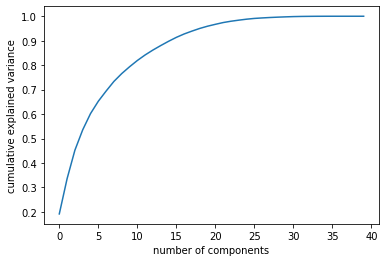

In [54]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Dimensionality reduction

In [95]:
num_components = 22
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Finding the most important features set


In [96]:
pd.DataFrame(pca.components_, columns = CA_inertia_data_filtered.columns)


,countyFIPS,population,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Population.density,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate
0,-0.001478,0.066850,0.107368,0.104679,-0.034567,-0.027260,-0.036034,0.025864,-0.101818,-0.015800,0.143969,0.066784,-0.018791,0.045750,-0.042477,0.046428,0.046333,0.021632,-0.016225,0.067828,0.061381,-0.000235,0.000000e+00,0.000000e+00,0.241893,0.330090,-0.105612,0.327477,0.036974,0.315864,0.316193,0.314723,0.212704,0.322034,0.193434,0.003353,0.139321,0.242671,0.254281,-0.017737
1,-0.002315,-0.207916,-0.293687,-0.302970,0.224454,0.067410,0.054912,0.215618,0.086633,0.214104,-0.070130,-0.207762,0.212928,-0.228160,0.117936,-0.221637,-0.147730,-0.016696,0.076355,-0.288480,-0.278318,-0.055329,-0.000000e+00,-0.000000e+00,0.085877,0.104335,0.047107,0.086248,-0.144428,0.139250,0.021896,0.041250,-0.095817,0.136419,0.102722,-0.191037,-0.135221,-0.042372,0.158726,-0.174067
2,0.028316,0.273872,-0.174170,-0.139688,0.184317,-0.174090,-0.205515,0.008697,0.205236,0.149803,0.163894,0.273474,0.126290,0.083452,-0.254122,0.104163,0.212118,0.190693,-0.077729,0.212101,0.169438,-0.147051,9.403955e-38,-2.938736e-39,0.043592,-0.014378,-0.084963,-0.032763,-0.190251,0.035530,-0.127954,-0.097413,0.187010,0.034728,0.020388,-0.226997,-0.256765,-0.188717,0.077255,-0.226116
3,0.039414,0.040131,0.000971,-0.072850,0.086102,-0.219123,-0.193951,-0.059210,0.151152,0.059272,0.036963,0.039756,0.002555,-0.270289,-0.272427,-0.205699,0.097192,0.340115,0.012439,-0.184658,-0.230489,-0.406654,-0.000000e+00,-0.000000e+00,0.047258,-0.022801,-0.078119,-0.000150,0.189912,-0.094656,0.099192,0.073553,0.000665,-0.085919,-0.078638,0.221269,0.252251,0.141103,-0.143940,0.249580
4,-0.007374,0.069580,-0.034287,-0.011381,0.434406,0.035205,0.041337,0.040518,-0.125261,0.471202,0.019745,0.069641,0.487051,0.124421,0.089996,0.096996,-0.007665,-0.127587,-0.040424,0.127482,0.131176,0.192182,-1.577722e-30,-0.000000e+00,-0.083562,-0.029036,0.057705,-0.020932,0.105181,-0.089180,0.095367,0.063645,0.033194,-0.091463,-0.028235,0.120593,0.229132,0.144800,-0.104426,0.214553
5,-0.204468,0.281018,-0.089786,-0.107169,-0.084791,0.091415,0.336881,0.085423,-0.064140,-0.074811,0.390625,0.281381,-0.053502,-0.180825,0.154711,-0.219766,0.068652,-0.065053,0.195494,-0.053387,-0.102925,0.081173,4.038968e-28,0.000000e+00,0.099223,0.056422,0.267750,0.053323,-0.022657,-0.113581,0.052227,0.086361,0.295075,-0.062630,-0.241248,-0.044694,0.014192,-0.124970,-0.163176,0.045652
6,-0.261651,0.101281,0.100231,0.056823,0.002422,0.078643,0.216327,0.197567,-0.242216,0.049472,-0.037145,0.101039,0.020809,-0.014272,-0.130619,-0.106676,0.229244,0.126223,0.305857,-0.002654,-0.017714,-0.103882,-4.135903e-25,-0.000000e+00,-0.073762,-0.200406,0.078054,-0.220091,0.078254,0.106644,-0.150707,-0.240288,-0.051471,-0.004261,0.438235,0.111247,-0.008133,0.246639,0.264622,-0.070419
7,-0.195749,-0.231468,0.019426,0.053336,0.051503,0.218765,0.145817,0.098832,0.004612,0.052066,-0.184662,-0.232165,0.001532,0.255750,-0.296935,0.106428,0.269493,0.166999,0.404120,0.082747,0.143592,-0.152910,-0.000000e+00,1.654361e-24,0.171287,0.119283,0.061548,0.119735,-0.102906,-0.080536,0.099573,0.149148,-0.103140,-0.017176,-0.262015,-0.117694,0.006689,-0.146807,-0.159915,0.038625
8,-0.151660,-0.059295,0.207417,0.195380,0.131831,-0.294218,-0.035295,-0.316683,0.133

In [103]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names_inertia = CA_inertia_data_filtered.columns
# get the most important feature names
most_important_names_inertia = [initial_feature_names_inertia[most_important[i]] for i in range(n_pcs)]

In [98]:
print(" initial_feature_names : ",initial_feature_names_inertia)

print("most_important_names: ", most_important_names_inertia)

print(len(initial_feature_names_inertia), len(most_important_names_inertia), len(initial_feature_names_inertia) - len(most_important_names_inertia))

 initial_feature_names :  Index(['countyFIPS', 'population', 'Social.distancing.index',
       'X..staying.home', 'Trips.person', 'X..out.of.county.trips',
       'X..out.of.state.trips', 'Miles.person', 'Work.trips.person',
       'Non.work.trips.person', 'New.COVID.cases', 'Population',
       'X..change.in.consumption', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'New.cases.1000.people', 'Active.cases.1000.people',
       'X.days..decreasing.COVID.cases', 'X..hospital.bed.utilization',
       'Testing.capacity', 'Tests.done.1000.people', 'X..ICU.utilization',
       'Ventilator.shortage', 'Imported.COVID.cases',
       'COVID.exposure.1000.people', 'X.days..decreasing.ILI.cases',
       'Unemployment.claims.1000.people', 'Unemployment.rate',
       

In [99]:
initial_feature_names_inertia = initial_feature_names_inertia.sort_values()
initial_feature_names_inertia

Index(['Active.cases.1000.people', 'COVID.death.rate',
       'COVID.exposure.1000.people', 'Cumulative.inflation.rate',
       'Employment.density', 'Hospital.beds.1000.people', 'ICUs.1000.people',
       'Imported.COVID.cases', 'Median.income', 'Miles.person',
       'New.COVID.cases', 'New.cases.1000.people', 'Non.work.trips.person',
       'Population', 'Population.density', 'Social.distancing.index',
       'Testing.capacity', 'Tests.done.1000.people', 'Transit.mode.share',
       'Trips.person', 'Unemployment.claims.1000.people', 'Unemployment.rate',
       'Ventilator.shortage', 'Work.trips.person', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..ICU.utilization', 'X..Male',
       'X..change.in.consumption', 'X..hospital.bed.utilization',
       'X..hot.spots.1000.people', 'X..out.of.county.trips',
       'X..out.of.state.trips', 'X..people.older.than.60', 'X..staying.home',
       'X..working.from.home', 'X.days..decreasing.COVID.cases',
       'X.days..decreasing.

In [104]:
most_important_names_inertia.sort()
most_important_names_inertia

['Active.cases.1000.people',
 'Median.income',
 'Miles.person',
 'New.COVID.cases',
 'New.cases.1000.people',
 'Testing.capacity',
 'Testing.capacity',
 'Transit.mode.share',
 'Work.trips.person',
 'X..African.Americans',
 'X..Hispanic.Americans',
 'X..Male',
 'X..change.in.consumption',
 'X..hot.spots.1000.people',
 'X..out.of.state.trips',
 'X..staying.home',
 'X.days..decreasing.COVID.cases',
 'X.days..decreasing.COVID.cases',
 'X.days..decreasing.ILI.cases',
 'countyFIPS',
 'countyFIPS',
 'population']

## Conclusion for inertia data

As per PCA analysis, the following columns should be dropped from time-series forecasting

1. 'COVID.death.rate'
2. 'COVID.exposure.1000.people'
3. 'Cumulative.inflation.rate',
4.  'Employment.density'
5. 'Hospital.beds.1000.people'
6. 'ICUs.1000.people',
7. 'Imported.COVID.cases'
8. 'Non.work.trips.person',
9. 'Population'
10. 'Population.density'
11. 'Social.distancing.index'
12. 'Tests.done.1000.people'
13. 'Trips.person'
14. 'Unemployment.claims.1000.people'
15. 'Unemployment.rate',
16. 'Ventilator.shortage'
17. 'X..ICU.utilization',
18. 'X..hospital.bed.utilization'
19. 'X..people.older.than.60',
20. 'X..working.from.home'


## Correlation map

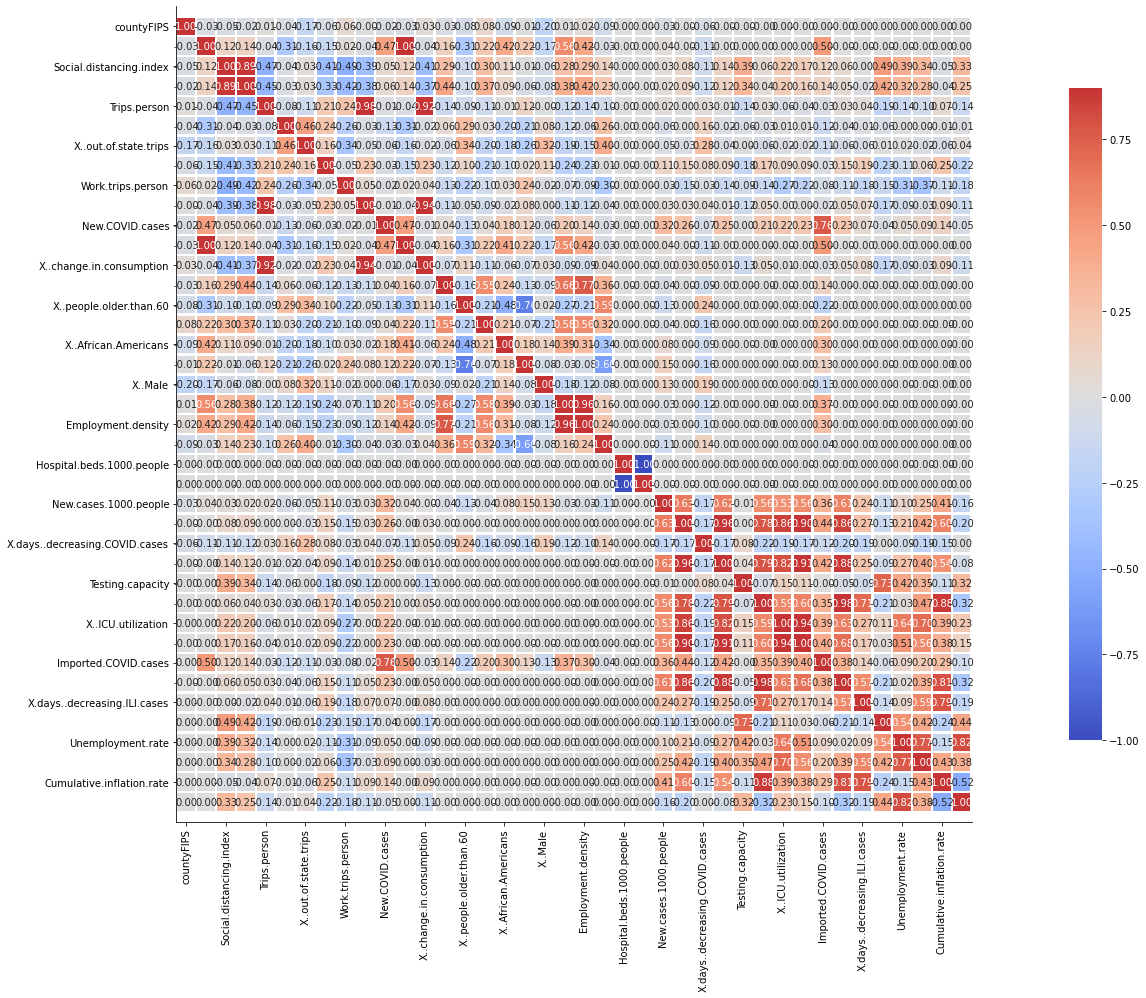

In [107]:

corr = CA_inertia_data_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(35, 15)

# Reference

* https://medium.com/@ansjin/dimensionality-reduction-using-pca-on-multivariate-timeseries-data-b5cc07238dc4